In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler


# 3. Pair Programming Ajuste

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:

Realizar el ajuste o ajustes de los modelos

Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [2]:
df = pd.read_pickle('datos/Invistico_Airline_v3.pkl')
df.head(2)

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Checkin service,Cleanliness,Online boarding,cat_retraso_salida,cat_retraso_llegada,cat_distance,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,3,1,1,0,0,0,2,2,...,5,3,2,< 15,< 15,<1000,1.691495,-1.671090,-0.386036,-0.392329
1,1,0,3,1,2,0,0,0,3,0,...,2,3,2,120+,120+,1000-4000,0.500825,0.470348,7.786328,7.536854


In [3]:
df.drop(['cat_retraso_salida', 'cat_retraso_llegada', 'cat_distance'], axis=1, inplace=True)

In [4]:
# separamos los datos en X (variables predictoras) e y (variable respuesta)

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [5]:
# separamos los datos en los grupos de entrenamiento y prueba

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 37)

In [6]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train, y_train)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test)

In [7]:
train_df_esta = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train)})
test_df_esta  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
9517,0,0,Train
117907,1,1,Train
96597,1,1,Train
64932,1,1,Train
99051,1,1,Train


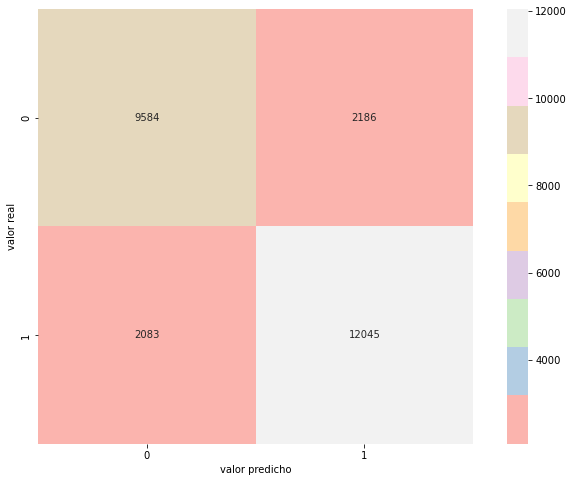

In [8]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y  ESTANDARIZADOS

mat_lr = confusion_matrix(y_test, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr, square=True, annot=True, fmt="d", cmap="Pastel1")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

# 4. Pair Programming Métricas

En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:

Calculad las métricas para vuestro modelo

Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

In [9]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [10]:
resultados_metricas = metricas(y_test, y_pred_test_esta, y_train, y_pred_train_esta, "Regresión logistica")
resultados_metricas

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.835161,0.846392,0.852562,0.849466,0.667323,test,Regresión logistica
1,0.835610,0.849047,0.851306,0.850175,0.668084,train,Regresión logistica


# Datos sin estandarizar

In [11]:
df2 = pd.read_pickle('datos/Invistico_Airline_v2.pkl')
df2.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,cat_retraso_salida,cat_retraso_llegada,cat_distance
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0,3,5,3,2,0,0.0,< 15,< 15,<1000
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,4,4,2,3,2,310,305.0,120+,120+,1000-4000


In [12]:
df2.reset_index(inplace=True, drop=True)

In [13]:
df2['Gender'] = df2['Gender'].map({'Female': 1, 'Male': 0})
df2['Customer Type'] = df2['Customer Type'].map({'Loyal Customer': 3, 'disloyal Customer': 1})
df2['Type of Travel'] = df2['Type of Travel'].map({'Business travel': 2, 'Personal Travel': 1})
df2['Class'] = df2['Class'].map({'Business': 2, 'Eco Plus': 1, 'Eco': 1})
df2['satisfaction'] = df2['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

In [14]:
df2.drop(['cat_retraso_salida', 'cat_retraso_llegada', 'cat_distance'], axis=1, inplace=True)
df2.head(1)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,3,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0


In [15]:
X2 = df2.drop('satisfaction', axis=1)
y2 = df2['satisfaction']

In [16]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 37)

In [17]:
log_reg_no_esta = LogisticRegression(n_jobs=-1, max_iter = 3000)

# ajustamos el modelo
log_reg_no_esta.fit(x_train2, y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_no_esta = log_reg_no_esta.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test_no_esta = log_reg_no_esta.predict(x_test2)

In [18]:
train_df_no_esta = pd.DataFrame({'Real': y_train2, 'Predicted': y_pred_train_no_esta, 'Set': ['Train']*len(y_train2)})
test_df_no_esta  = pd.DataFrame({'Real': y_test2,  'Predicted': y_pred_test_no_esta,  'Set': ['Test']*len(y_test2)})
resultados_no_esta = pd.concat([train_df_no_esta,test_df_no_esta], axis = 0)
resultados_no_esta.head()

,Real,Predicted,Set
9517,0,0,Train
117907,1,1,Train
96597,1,1,Train
64932,1,1,Train
99051,1,1,Train


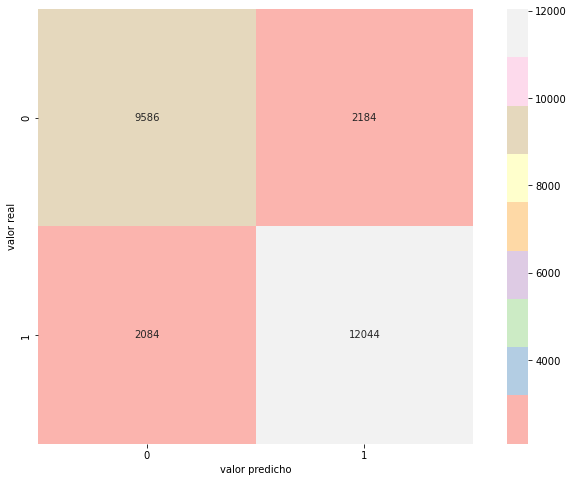

In [19]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y  ESTANDARIZADOS

mat_lr_no_esta = confusion_matrix(y_test2, y_pred_test_no_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_no_esta, square=True, annot=True, fmt="d", cmap="Pastel1")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [20]:
resultados_metricas_no_esta = metricas(y_test2, y_pred_test_no_esta, y_train2, y_pred_train_no_esta, "Regresión logistica no esta")
resultados_metricas_no_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.835200,0.846500,0.852492,0.849485,0.667408,test,Regresión logistica no esta
1,0.835735,0.849413,0.851059,0.850235,0.668363,train,Regresión logistica no esta


In [21]:
resultados_todo = pd.concat([resultados_metricas, resultados_metricas_no_esta], axis = 0)
resultados_todo

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.835161,0.846392,0.852562,0.849466,0.667323,test,Regresión logistica
1,0.835610,0.849047,0.851306,0.850175,0.668084,train,Regresión logistica
0,0.835200,0.846500,0.852492,0.849485,0.667408,test,Regresión logistica no esta
1,0.835735,0.849413,0.851059,0.850235,0.668363,train,Regresión logistica no esta


# Cambios en el encoding

In [22]:
df3 = pd.read_pickle('datos/Invistico_Airline_v2.pkl')
df3.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,cat_retraso_salida,cat_retraso_llegada,cat_distance
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0,3,5,3,2,0,0.0,< 15,< 15,<1000
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,4,4,2,3,2,310,305.0,120+,120+,1000-4000


In [23]:
df3.reset_index(inplace=True, drop=True)

In [24]:
df_num2 = df3.select_dtypes(include=np.number)
df_num2.head(2)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,265,0,0.0
1,47,2464,310,305.0


In [26]:
# no cambiamos el código porque la estandarización anterior está en el notebook regresion-logistica-2
scaler = StandardScaler()
scaler.fit(df_num2)
datos_estandarizados = scaler.transform(df_num2)
df_datos_estandarizados = pd.DataFrame(datos_estandarizados, columns = df_num2.columns)

In [27]:
df3.drop(columns=df_datos_estandarizados.columns, inplace=True)
df3 = pd.concat([df3, df_datos_estandarizados], axis = 1, join='inner')

In [28]:
df3['Gender'] = df3['Gender'].map({'Female': 1, 'Male': 0})
df3['Customer Type'] = df3['Customer Type'].map({'Loyal Customer': 2, 'disloyal Customer': 1})
df3['Type of Travel'] = df3['Type of Travel'].map({'Business travel': 2.4, 'Personal Travel': 1})
df3['Class'] = df3['Class'].map({'Business': 1.82, 'Eco Plus': 1.1, 'Eco': 1})
df3['satisfaction'] = df3['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

In [29]:
df3.drop(['cat_retraso_salida', 'cat_retraso_llegada', 'cat_distance'], axis=1, inplace=True)
df3.head(1)

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,2,1.0,1.0,0,0,0,2,2,...,3,0,3,5,3,2,1.691495,-1.67109,-0.386036,-0.392329


In [30]:
X3 = df3.drop('satisfaction', axis=1)
y3 = df3['satisfaction']

In [31]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 37)

In [32]:
log_reg_enco = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_enco.fit(x_train3, y_train3)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_enco = log_reg_enco.predict(x_train3)

# obtenemos las predicciones para el conjunto de test
y_pred_test_enco = log_reg_enco.predict(x_test3)

In [33]:
train_df_enco = pd.DataFrame({'Real': y_train3, 'Predicted': y_pred_train_enco, 'Set': ['Train']*len(y_train3)})
test_df_enco  = pd.DataFrame({'Real': y_test3,  'Predicted': y_pred_test_enco,  'Set': ['Test']*len(y_test3)})
resultados_enco = pd.concat([train_df_enco,test_df_enco], axis = 0)
resultados_enco.head()

,Real,Predicted,Set
9517,0,0,Train
117907,1,1,Train
96597,1,1,Train
64932,1,1,Train
99051,1,1,Train


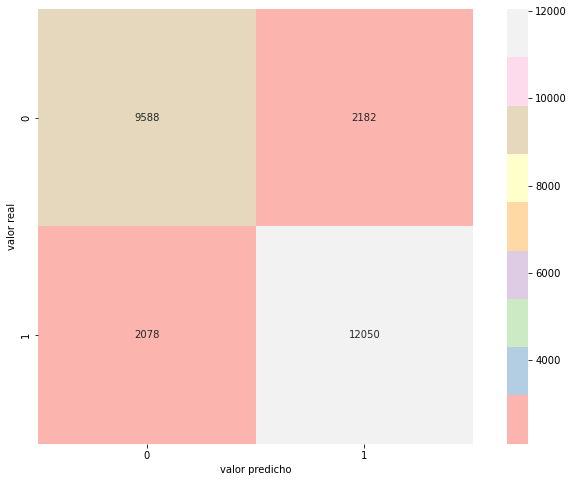

In [34]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y  ESTANDARIZADOS

mat_lr_enco = confusion_matrix(y_test3, y_pred_test_enco)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_enco, square=True, annot=True, fmt="d", cmap="Pastel1")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [35]:
resultados_metricas_enco = metricas(y_test3, y_pred_test_enco, y_train3, y_pred_train_enco, "Regresión logistica enco")
resultados_metricas_enco

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.835509,0.846684,0.852916,0.849788,0.668022,test,Regresión logistica enco
1,0.835456,0.849004,0.851024,0.850013,0.667782,train,Regresión logistica enco


In [36]:
resultados_todo = pd.concat([resultados_metricas_enco, resultados_todo], axis = 0)
resultados_todo

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.835509,0.846684,0.852916,0.849788,0.668022,test,Regresión logistica enco
1,0.835456,0.849004,0.851024,0.850013,0.667782,train,Regresión logistica enco
0,0.835161,0.846392,0.852562,0.849466,0.667323,test,Regresión logistica
1,0.835610,0.849047,0.851306,0.850175,0.668084,train,Regresión logistica
0,0.835200,0.846500,0.852492,0.849485,0.667408,test,Regresión logistica no esta
1,0.835735,0.849413,0.851059,0.850235,0.668363,train,Regresión logistica no esta


In [37]:
resultados_todo.to_pickle('datos/Invistico_Airline_r_log.pkl')

In [38]:
df3.to_pickle('datos/Invistico_Airline_v4_enco.pkl')